In [58]:
#importing libararies
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Analyse about the data set

In [59]:
#reading the data set
Train_Data = pd.read_csv("Olenzro_bank.csv")
Train_Data.head()



,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1,2009,01/08/2009,1102011,0.5,RENT,1,Low,85000,1,...,11.89,21,B,2,19.48,29324.32,25000.00,0.00,829.10,ulster
1,2,2008,01/07/2008,1032010,0.5,RENT,1,Low,30000,1,...,16.08,43,F,6,23.84,1207.76,999.99,0.00,35.20,cannught
2,3,2008,01/05/2008,1062011,0.5,RENT,1,Low,65000,1,...,10.71,20,B,2,14.29,8215.45,7000.00,0.00,228.22,Northern-Irl
3,4,2008,01/04/2008,1102008,10.0,MORTGAGE,3,Medium,189500,2,...,16.08,55,F,6,22.47,1231.90,783.46,0.25,246.38,ulster
4,5,2014,01/08/2014,1122014,1.0,RENT,1,Low,70000,1,...,16.99,18,D,4,10.50,6073.10,1634.65,3354.94,891.20,Northern-Irl


In [60]:
Train_Data.tail()


,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
113275,113276,2015,01/12/2015,1012016,0.5,RENT,1,Low,56000,1,...,16.55,58,D,4,25.11,0.0,0.0,0.0,531.44,cannught
113276,113277,2015,01/12/2015,1012016,7.0,MORTGAGE,3,Medium,101000,2,...,16.99,53,D,4,22.66,0.0,0.0,0.0,596.34,leinster
113277,113278,2015,01/12/2015,1012016,4.0,MORTGAGE,3,Low,98000,1,...,12.59,27,C,3,17.32,0.0,0.0,0.0,80.40,ulster
113278,113279,2015,01/12/2015,1012016,3.0,MORTGAGE,3,Low,61900,1,...,15.41,21,D,4,20.32,0.0,0.0,0.0,209.20,Northern-Irl
113279,113280,2015,01/12/2015,1012016,6.0,RENT,1,Medium,150000,2,...,21.99,87,F,6,19.21,0.0,0.0,0.0,773.18,Northern-Irl


In [61]:
Train_Data.shape

(113280, 31)

In [62]:
#cheking  data types of the coulmn
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113280 entries, 0 to 113279
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    113280 non-null  int64  
 1   year                  113280 non-null  int64  
 2   issue_d               113280 non-null  object 
 3   final_d               113280 non-null  int64  
 4   emp_length_int        113280 non-null  float64
 5   home_ownership        113280 non-null  object 
 6   home_ownership_cat    113280 non-null  int64  
 7   income_category       113280 non-null  object 
 8   annual_inc            113280 non-null  int64  
 9   income_cat            113280 non-null  int64  
 10  loan_amount           113280 non-null  int64  
 11  term                  113280 non-null  object 
 12  term_cat              113280 non-null  int64  
 13  application_type      113280 non-null  object 
 14  application_type_cat  113280 non-null  int64  
 15  

In [63]:
#cheking the available columns in the data set
Train_Data.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'age', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

C:\Users\HP\AppData\Local\Temp\ipykernel_17476\231503113.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_Data.corr() , annot=True)


<Axes: >

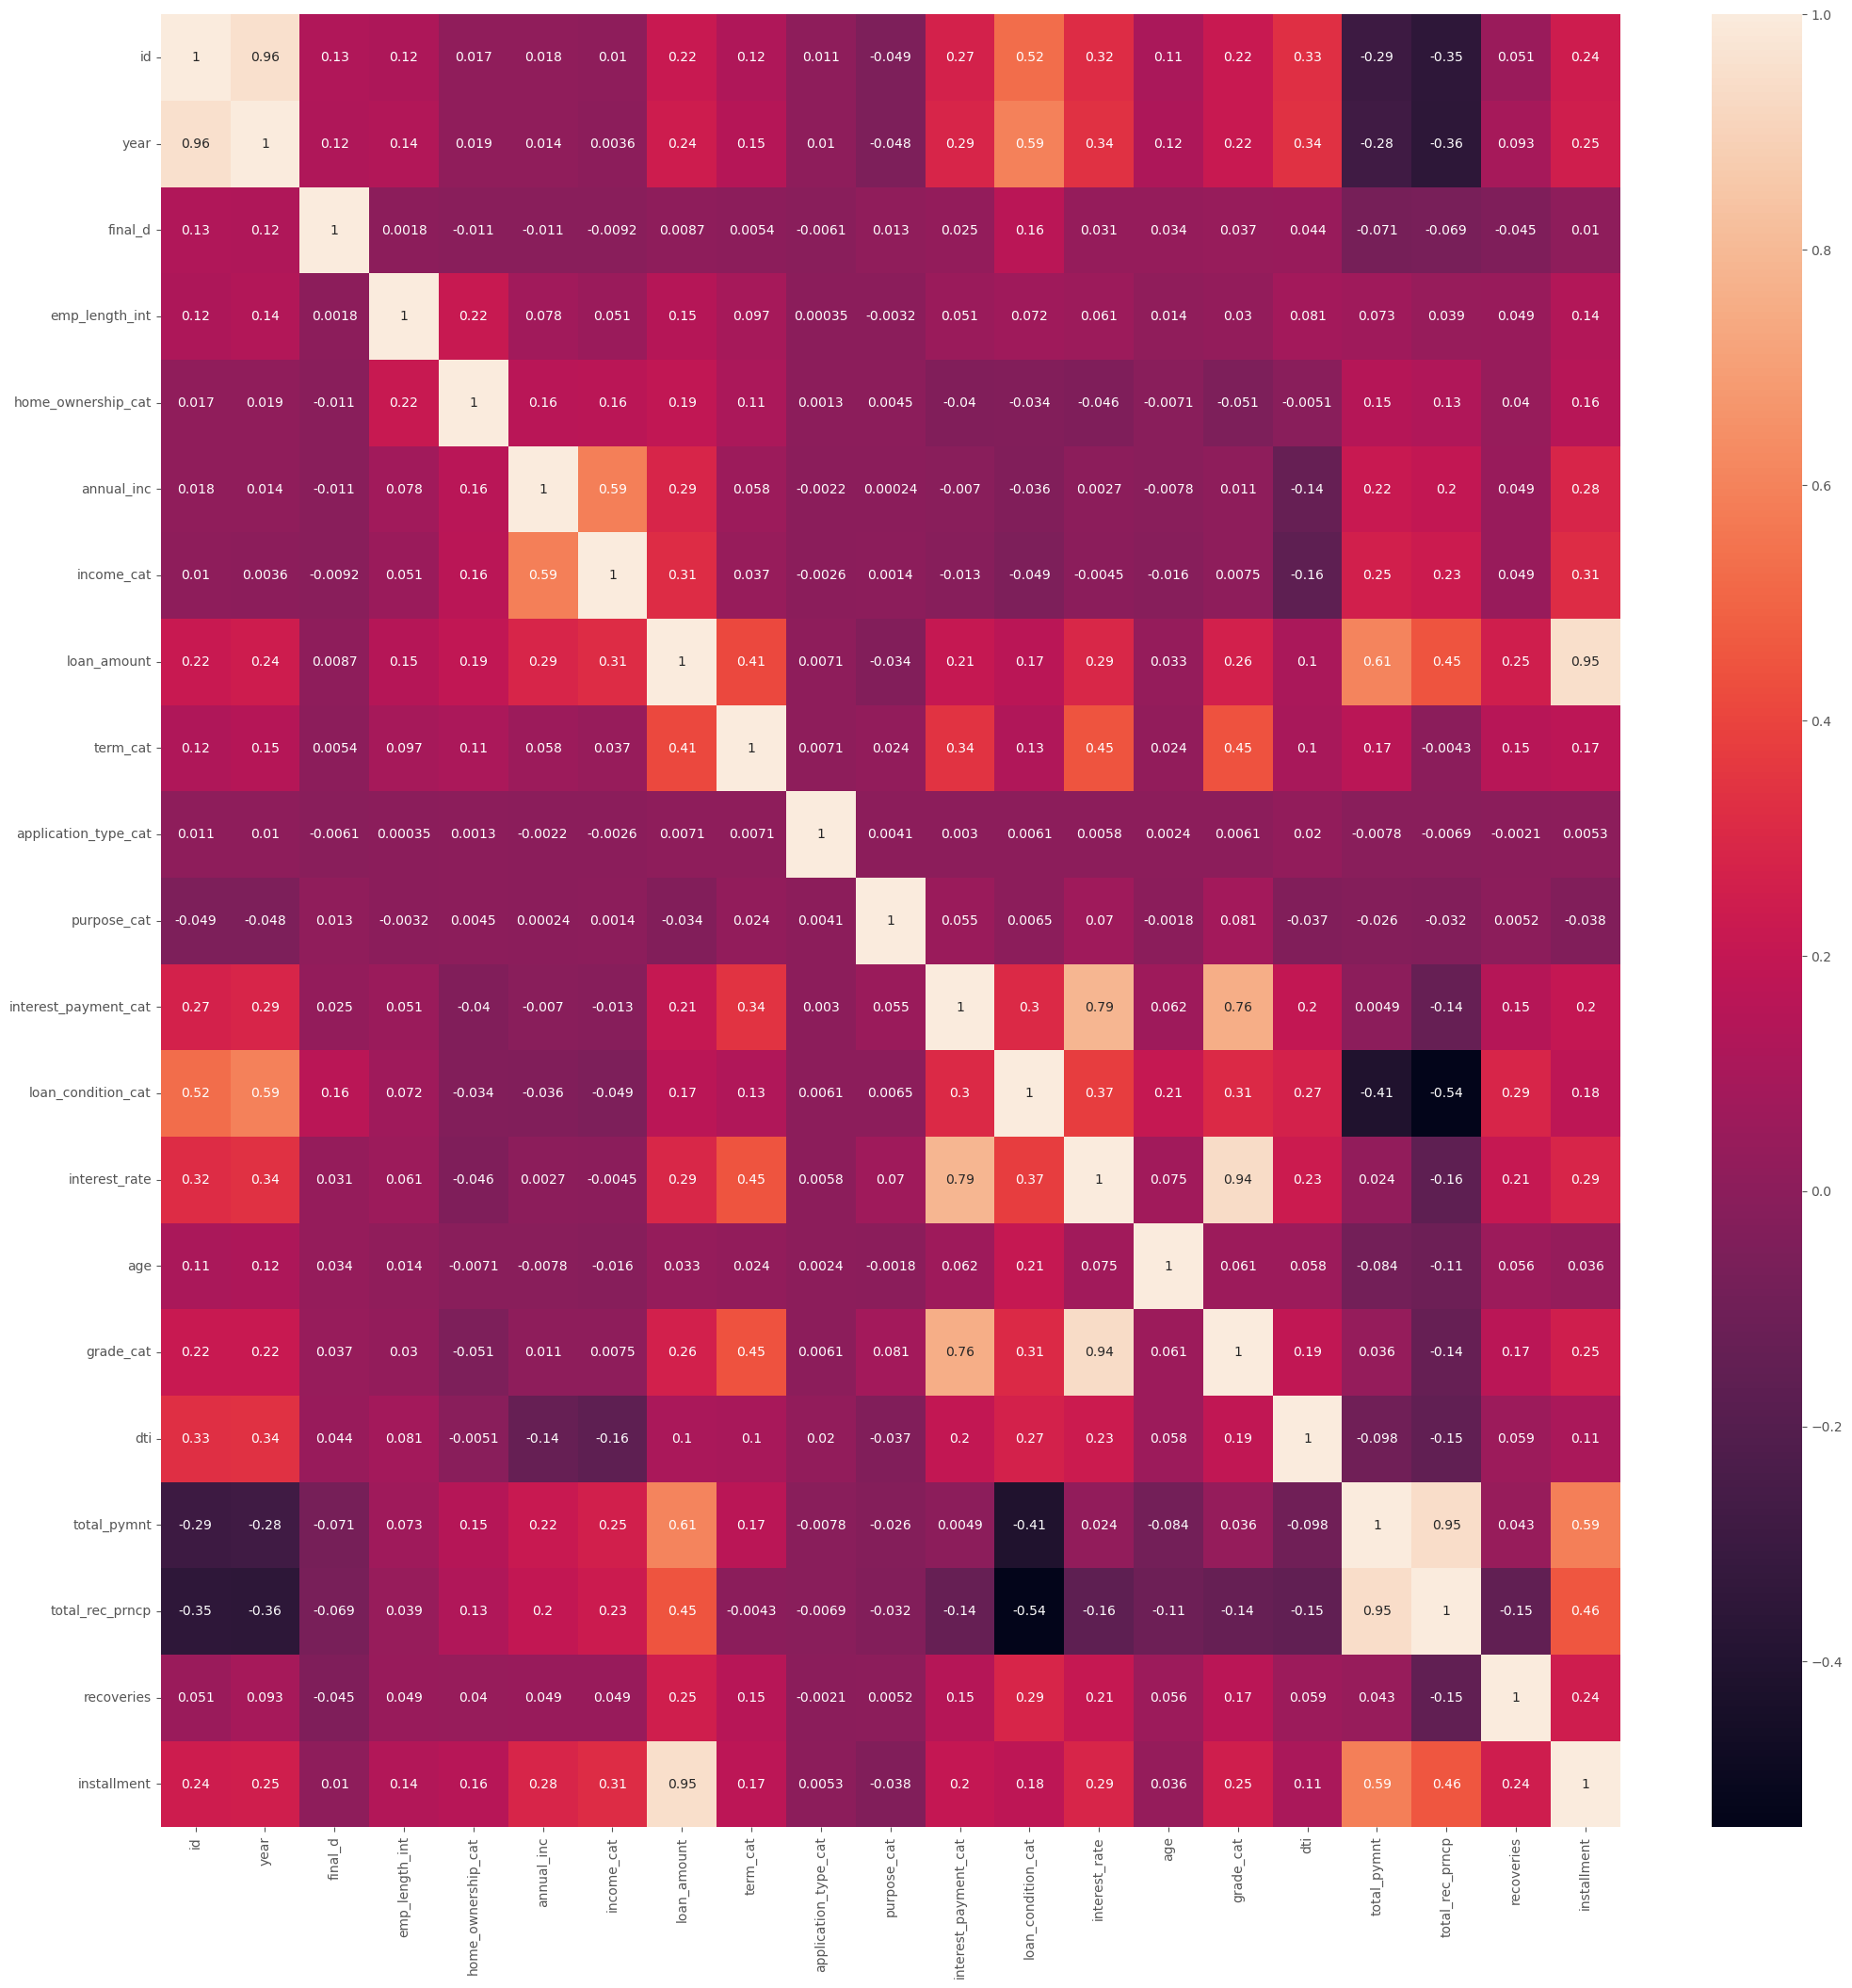

In [64]:
plt.figure(figsize=(25,25))
sns.heatmap(Train_Data.corr() , annot=True)

In [65]:
# Numeric Variables's statistical summary
Train_Data.describe()

,id,year,final_d,emp_length_int,home_ownership_cat,annual_inc,income_cat,loan_amount,term_cat,application_type_cat,...,interest_payment_cat,loan_condition_cat,interest_rate,age,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment
count,113280.000000,113280.000000,1.132800e+05,113280.000000,113280.000000,1.132800e+05,113280.000000,113280.000000,113280.000000,113280.000000,...,113280.000000,113280.000000,113272.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000
mean,56640.500000,2012.246204,1.069539e+06,5.626671,2.007760,6.947177e+04,1.156647,13579.070886,1.304944,1.000044,...,1.579952,0.544703,14.362952,47.578964,3.075980,16.787528,9395.249278,6735.842002,330.392153,408.286032
std,32701.263584,1.818962,3.846970e+04,3.491567,0.957921,6.438527e+04,0.400955,8285.573758,0.460386,0.006644,...,0.493568,0.498000,4.515381,20.206136,1.435671,8.045788,7928.634304,6413.635522,1059.828025,245.104487
min,1.000000,2007.000000,1.012008e+06,0.500000,1.000000,1.896000e+03,1.000000,500.000000,1.000000,1.000000,...,1.000000,0.000000,5.320000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.670000
25%,28320.750000,2011.000000,1.032015e+06,2.000000,1.000000,4.200000e+04,1.000000,7100.000000,1.000000,1.000000,...,1.000000,0.000000,11.120000,30.000000,2.000000,10.810000,3584.020000,2000.000000,0.000000,227.410000
50%,56640.500000,2013.000000,1.072014e+06,6.000000,2.000000,6.000000e+04,1.000000,12000.000000,1.000000,1.000000,...,2.000000,1.000000,14.090000,47.000000,3.000000,16.580000,7166.635000,4800.000000,0.000000,354.450000
75%,84960.250000,2014.000000,1.102015e+06,10.000000,3.000000,8.300000e+04,1.000000,18825.000000,2.000000,1.000000,...,2.000000,1.000000,17.390000,63.000000,4.000000,22.380000,12862.712500,9646.820000,0.000000,537.950000
max,113280.000000,2015.000000,1.122015e+06,10.000000,5.000000,8.900060e+06,3.000000,35000.000000,2.000000,2.000000,...,2.000000,1.000000,28.990000,90.000000,7.000000,59.260000,56809.051630,35000.030000,33520.270000,1424.570000


## Data Preprocessing

## Identify null values

In [66]:
#check null values of the trainin gdata set

Train_Data.isnull()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113276,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113277,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
Train_Data.isnull().sum().sort_values(ascending=False)

interest_rate           8
id                      0
purpose_cat             0
installment             0
recoveries              0
total_rec_prncp         0
total_pymnt             0
dti                     0
grade_cat               0
grade                   0
age                     0
loan_condition_cat      0
loan_condition          0
interest_payment_cat    0
interest_payments       0
purpose                 0
year                    0
application_type_cat    0
application_type        0
term_cat                0
term                    0
loan_amount             0
income_cat              0
annual_inc              0
income_category         0
home_ownership_cat      0
home_ownership          0
emp_length_int          0
final_d                 0
issue_d                 0
region                  0
dtype: int64

## handling numerical missing data

In [68]:
# handle numerical missing data
Train_Data['interest_rate'] = Train_Data['interest_rate'].fillna(Train_Data['interest_rate'].mean())

In [69]:
# cheking whether the null values replaced or not
Train_Data.isnull().sum().sort_values(ascending=False)

id                      0
purpose_cat             0
installment             0
recoveries              0
total_rec_prncp         0
total_pymnt             0
dti                     0
grade_cat               0
grade                   0
age                     0
interest_rate           0
loan_condition_cat      0
loan_condition          0
interest_payment_cat    0
interest_payments       0
purpose                 0
year                    0
application_type_cat    0
application_type        0
term_cat                0
term                    0
loan_amount             0
income_cat              0
annual_inc              0
income_category         0
home_ownership_cat      0
home_ownership          0
emp_length_int          0
final_d                 0
issue_d                 0
region                  0
dtype: int64

In [70]:
#check duplicate values of the trainin gdata set


# Count of duplicate records persent in the data

duplicateRows = Train_Data[Train_Data.duplicated()]
print("Number of duplicate rows:",duplicateRows.shape)

Number of duplicate rows: (0, 31)


## adding meaningful attribute values to maintain the consistency

In [71]:
Train_Data.loc[Train_Data['term'] == '36 months', 'term'] = 36
Train_Data.loc[Train_Data['term'] == '60 months', 'term'] = 60
Train_Data.loc[Train_Data['home_ownership'] == 'MORTGAGE', 'home_ownership'] = 'Mortgage'
Train_Data.loc[Train_Data['home_ownership'] == 'ANY', 'home_ownership'] = 'Any'
Train_Data.loc[Train_Data['home_ownership'] == 'RENT', 'home_ownership'] = 'Rent'
Train_Data.loc[Train_Data['home_ownership'] == 'OWN', 'home_ownership'] = 'Own'
Train_Data.loc[Train_Data['home_ownership'] == 'NONE', 'home_ownership'] = 'None'
Train_Data.loc[Train_Data['home_ownership'] == 'OTHER', 'home_ownership'] = 'Other'
Train_Data.loc[Train_Data['application_type'] == 'INDIVIDUAL', 'application_type'] = 'Individual'
Train_Data.loc[Train_Data['application_type'] == 'JOINT', 'application_type'] = 'Joint'
Train_Data.loc[Train_Data['purpose'] == 'credit_card', 'purpose'] = 'Credit Card'
Train_Data.loc[Train_Data['purpose'] == 'debt_consolidation', 'purpose'] = 'Debt consolidation'
Train_Data.loc[Train_Data['purpose'] == 'renewable_energy', 'purpose'] = 'Renewable energy'
Train_Data.loc[Train_Data['purpose'] == 'major_purchase', 'purpose'] = 'Major Purchase'
Train_Data.loc[Train_Data['purpose'] == 'small_business', 'purpose'] = 'Small Business'
Train_Data.loc[Train_Data['purpose'] == 'home_improvment', 'purpose'] = 'Home Improvment'
Train_Data.loc[Train_Data['purpose'] == 'car', 'purpose'] = 'Car'
Train_Data.loc[Train_Data['purpose'] == 'educational', 'purpose'] = 'Educational'
Train_Data.loc[Train_Data['purpose'] == 'house', 'purpose'] = 'House'
Train_Data.loc[Train_Data['purpose'] == 'medical', 'purpose'] = 'Medical'
Train_Data.loc[Train_Data['purpose'] == 'moving', 'purpose'] = 'Moving'
Train_Data.loc[Train_Data['purpose'] == 'other', 'purpose'] = 'Other'
Train_Data.loc[Train_Data['purpose'] == 'vacation', 'purpose'] = 'Vacation'
Train_Data.loc[Train_Data['purpose'] == 'wedding', 'purpose'] = 'Wedding'
Train_Data

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,age,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1,2009,01/08/2009,1102011,0.5,Rent,1,Low,85000,1,...,11.89,21,B,2,19.48,29324.32,25000.00,0.00,829.10,ulster
1,2,2008,01/07/2008,1032010,0.5,Rent,1,Low,30000,1,...,16.08,43,F,6,23.84,1207.76,999.99,0.00,35.20,cannught
2,3,2008,01/05/2008,1062011,0.5,Rent,1,Low,65000,1,...,10.71,20,B,2,14.29,8215.45,7000.00,0.00,228.22,Northern-Irl
3,4,2008,01/04/2008,1102008,10.0,Mortgage,3,Medium,189500,2,...,16.08,55,F,6,22.47,1231.90,783.46,0.25,246.38,ulster
4,5,2014,01/08/2014,1122014,1.0,Rent,1,Low,70000,1,...,16.99,18,D,4,10.50,6073.10,1634.65,3354.94,891.20,Northern-Irl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,113276,2015,01/12/2015,1012016,0.5,Rent,1,Low,56000,1,...,16.55,58,D,4,25.11,0.00,0.00,0.00,531.44,cannught
113276,113277,2015,01/12/2015,1012016,7.0,Mortgage,3,Medium,101000,2,...,16.99,53,D,4,22.66,0.00,0.00,0.00,596.34,leinster
113277,113278,2015,01/12/2015,1012016,4.0,Mortgage,3,Low,98000,1,...,12.59,27,C,3,17.32,0.00,0.00,0.00,80.40,ulster
113278,113279,2015,01/12/2015,1012016,3.0,Mortgage,3,Low,61900,1,...,15.41,21,D,4,20.32,0.00,0.00,0.00,209.20,Northern-Irl


In [72]:
#drop column which are not related
Train_Data = Train_Data.drop(columns=['id',
'year',
'issue_d',
'final_d',
'home_ownership_cat',
'income_cat',
'term_cat',
'application_type_cat',                            
'purpose_cat',                           
'interest_payment_cat',
'loan_condition_cat',
'grade_cat',
'total_rec_prncp',
'recoveries',
'region'],axis=1)

Train_Data

,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_payments,loan_condition,interest_rate,age,grade,dti,total_pymnt,installment
0,0.5,Rent,Low,85000,25000,36 months,Individual,Debt consolidation,Low,Good Loan,11.89,21,B,19.48,29324.32,829.10
1,0.5,Rent,Low,30000,1000,36 months,Individual,Debt consolidation,High,Good Loan,16.08,43,F,23.84,1207.76,35.20
2,0.5,Rent,Low,65000,7000,36 months,Individual,Credit Card,Low,Good Loan,10.71,20,B,14.29,8215.45,228.22
3,10.0,Mortgage,Medium,189500,7000,36 months,Individual,Debt consolidation,High,Bad Loan,16.08,55,F,22.47,1231.90,246.38
4,1.0,Rent,Low,70000,25000,36 months,Individual,Debt consolidation,High,Bad Loan,16.99,18,D,10.50,6073.10,891.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,Rent,Low,56000,15000,36 months,Individual,Debt consolidation,High,Bad Loan,16.55,58,D,25.11,0.00,531.44
113276,7.0,Mortgage,Medium,101000,24000,60 months,Individual,Debt consolidation,High,Bad Loan,16.99,53,D,22.66,0.00,596.34
113277,4.0,Mortgage,Low,98000,2400,36 months,Individual,Other,Low,Bad Loan,12.59,27,C,17.32,0.00,80.40
113278,3.0,Mortgage,Low,61900,6000,36 months,Individual,Vacation,High,Bad Loan,15.41,21,D,20.32,0.00,209.20


## Data visualization

## Exloratory data anlysis

## Check whether Categorical Default or not based on loan condition

In [73]:
#setting a value for indentify good loan and bad loan with a function
def defaulted(x):
    if x == 'Good Loan':
        return 0
    else:
        return 1

In [74]:
Train_Data['loan_cat'] = Train_Data['loan_condition'].apply(lambda x: defaulted(x))

**home_ownership: Home Owndership status

<Axes: title={'center': 'Home ownership vs Loan Condition'}, xlabel='home_ownership', ylabel='count'>

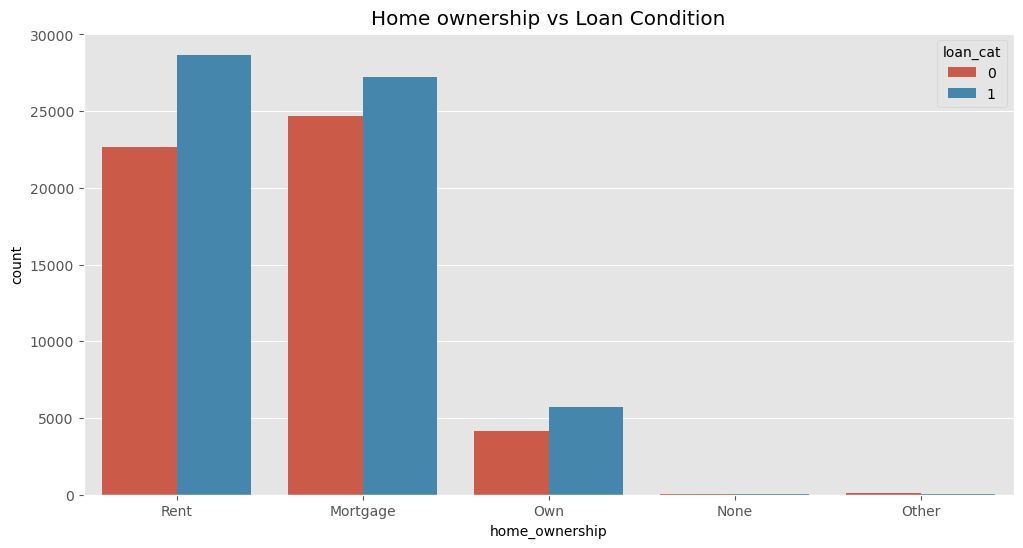

In [75]:
plt.figure(figsize=(12,6))
plt.title("Home ownership vs Loan Condition")
sns.countplot(x='home_ownership',data=Train_Data, hue='loan_cat')

**Income category

<Axes: title={'center': 'Income Category vs Loan Condition'}, xlabel='income_category', ylabel='count'>

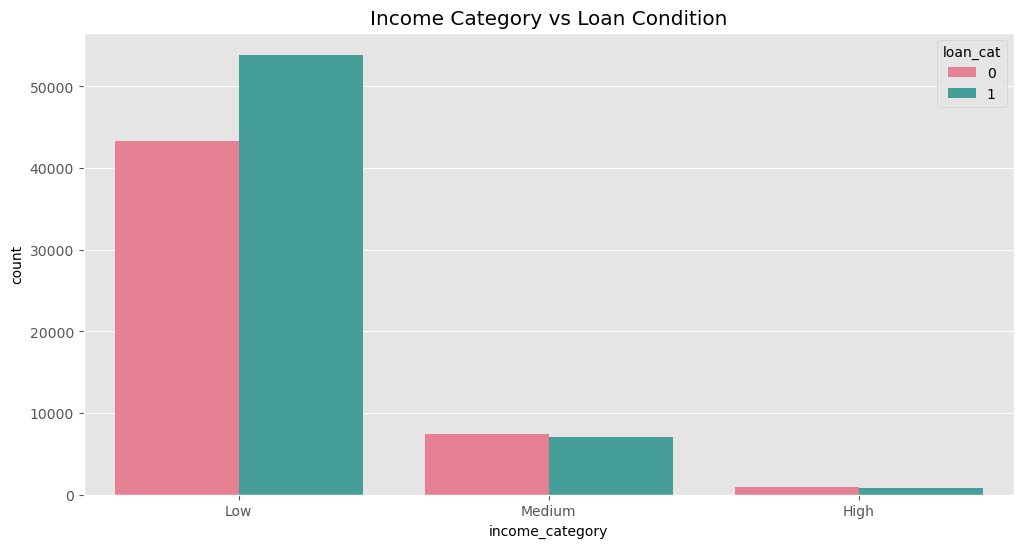

In [76]:
plt.figure(figsize=(12,6))
plt.title("Income Category vs Loan Condition")
sns.countplot(x='income_category',data=Train_Data, hue='loan_cat',palette="husl")

**term

<Axes: title={'center': 'Term vs Loan Condition'}, xlabel='term', ylabel='count'>

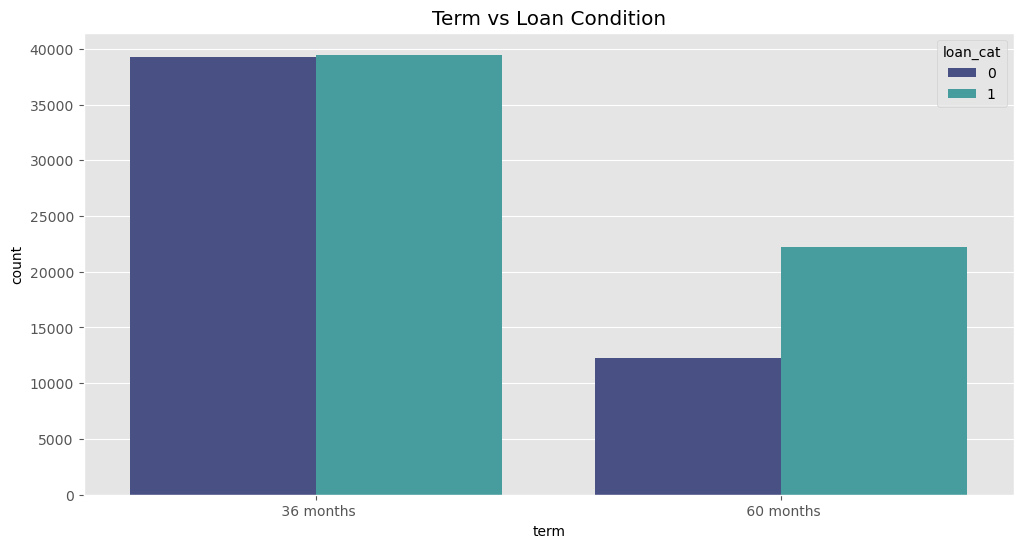

In [77]:
plt.figure(figsize=(12,6))
plt.title("Term vs Loan Condition")
sns.countplot(x='term',data=Train_Data, hue='loan_cat',palette="mako")

**Aplication Type

<Axes: title={'center': 'Application Type vs Loan Condition'}, xlabel='application_type', ylabel='count'>

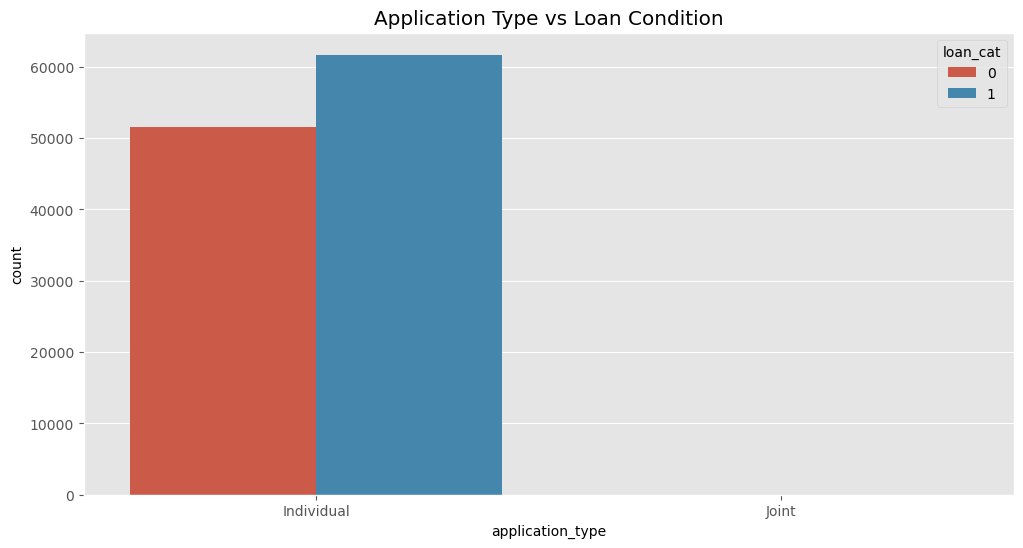

In [78]:


plt.figure(figsize=(12,6))
plt.title("Application Type vs Loan Condition")
sns.countplot(x='application_type',data=Train_Data, hue='loan_cat')

**Purpose

<Axes: title={'center': 'Purpose vs Loan Condition'}, xlabel='purpose', ylabel='count'>

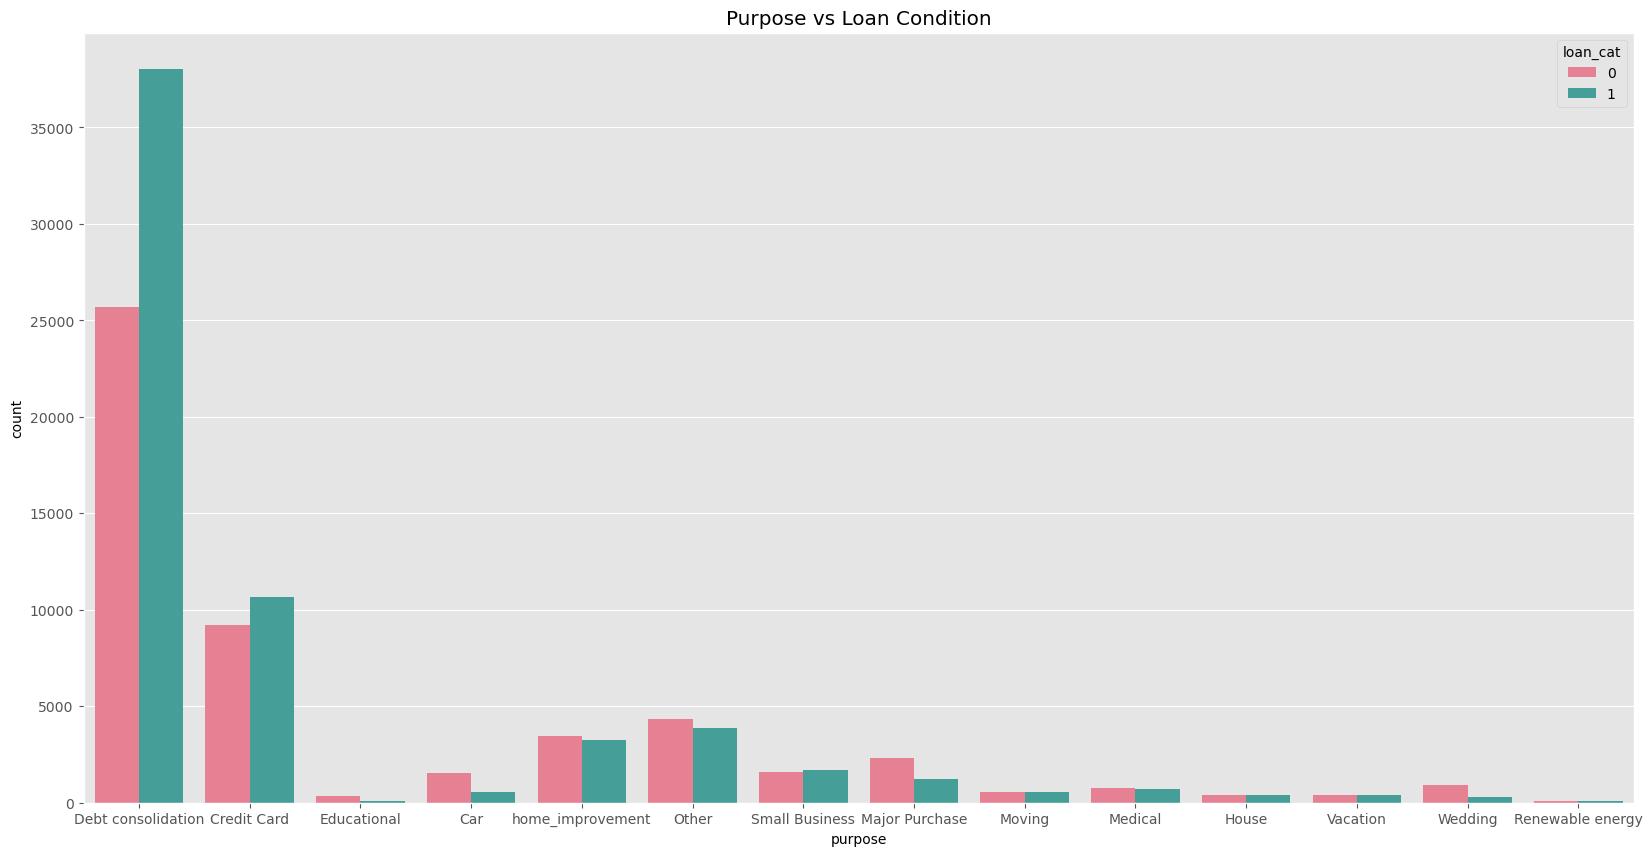

In [79]:
plt.figure(figsize=(20,10))
plt.title("Purpose vs Loan Condition")
sns.countplot(x='purpose',data=Train_Data, hue='loan_cat',palette="husl")

**Interest Payment

<Axes: title={'center': 'Interest Payments Type vs Loan Condition'}, xlabel='interest_payments', ylabel='count'>

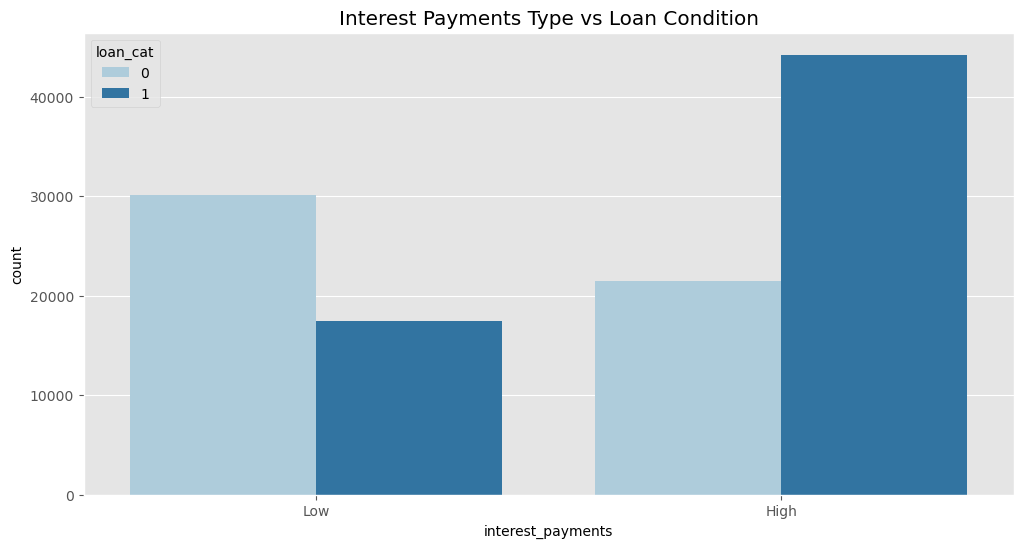

In [80]:
plt.figure(figsize=(12,6))
plt.title("Interest Payments Type vs Loan Condition")
sns.countplot(x='interest_payments',data=Train_Data, hue='loan_cat',palette="Paired")

## Numerical data vs Loan Condition

**Interest rate

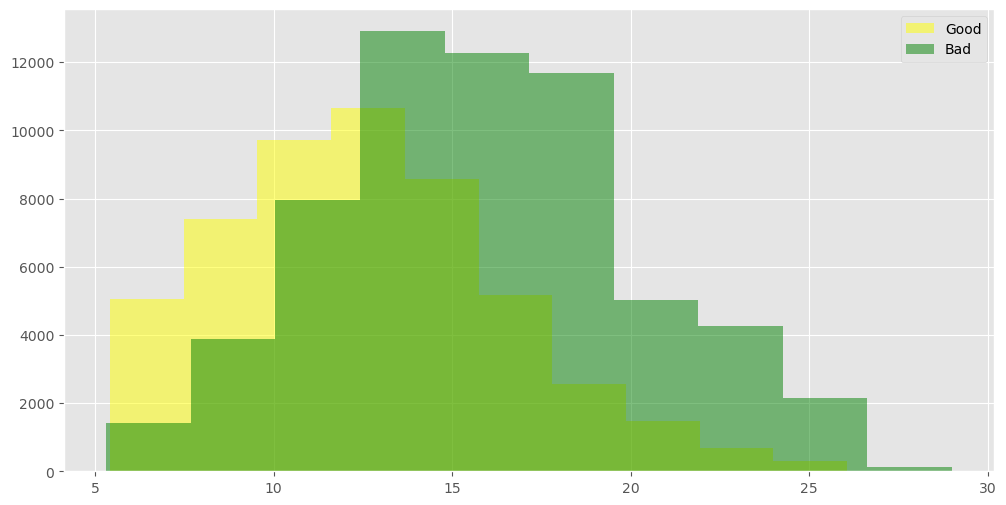

In [81]:
plt.figure(figsize=(12,6))
plt.hist(Train_Data[Train_Data['loan_cat']==0]['interest_rate'],color='yellow',alpha=0.5,label='Good')
plt.hist(Train_Data[Train_Data['loan_cat']==1]['interest_rate'],color='green',alpha=0.5,label='Bad')

plt.legend()

<Axes: xlabel='interest_rate'>

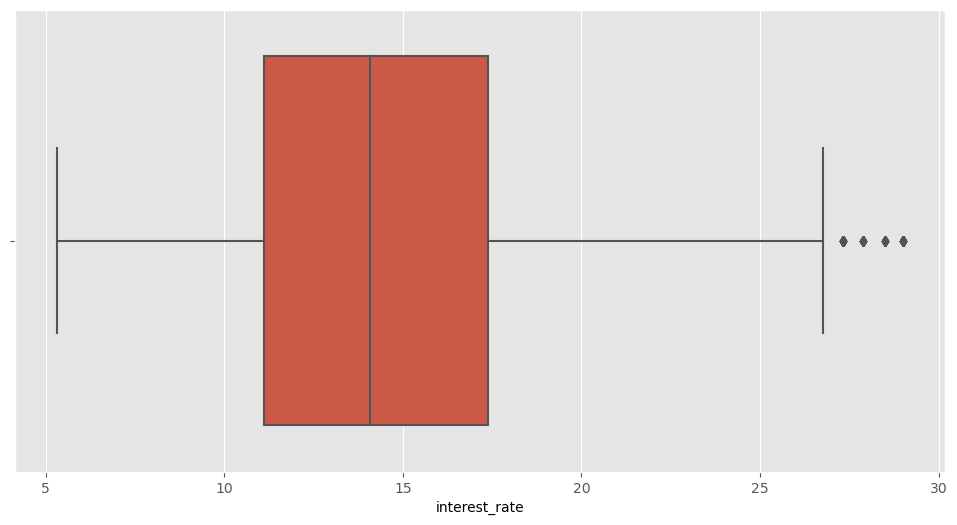

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['interest_rate'])

In [83]:
#removing outliers
outliers = Train_Data[Train_Data['interest_rate'] > Train_Data['interest_rate'].quantile(.99)].index

In [84]:
Train_Data.loc[outliers,'interest_rate'] = Train_Data['interest_rate'].quantile(.99)

In [85]:
scaler = MinMaxScaler()
Train_Data['interest_rate'] = scaler.fit_transform(Train_Data['interest_rate'].values.reshape(-1,1))

**loan_amount

<Axes: xlabel='loan_amount'>

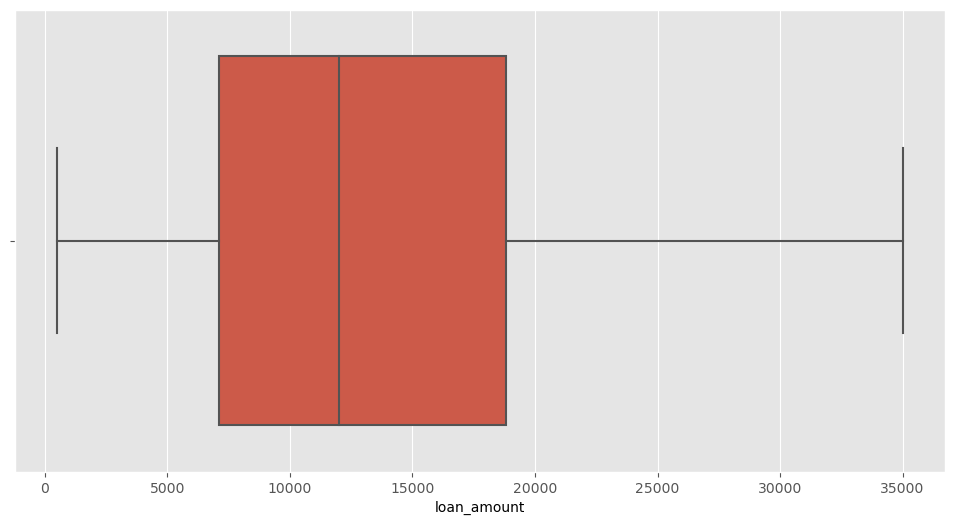

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x=Train_Data['loan_amount'])

***installment

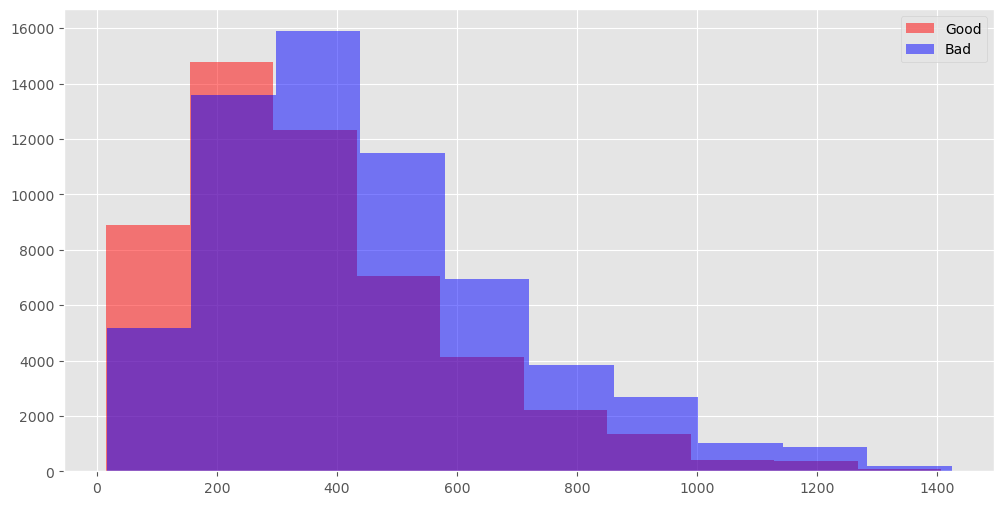

In [87]:
plt.figure(figsize=(12,6))
plt.hist(Train_Data[Train_Data['loan_cat']==0]['installment'],color='red',alpha=0.5,label='Good')
plt.hist(Train_Data[Train_Data['loan_cat']==1]['installment'],color='blue',alpha=0.5,label='Bad')

plt.legend()

## Identify correlation between attributes after the initial preprocessing 

C:\Users\HP\AppData\Local\Temp\ipykernel_17476\3284243467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Train_Data.corr(), annot=True, cmap = 'cubehelix')


<Axes: >

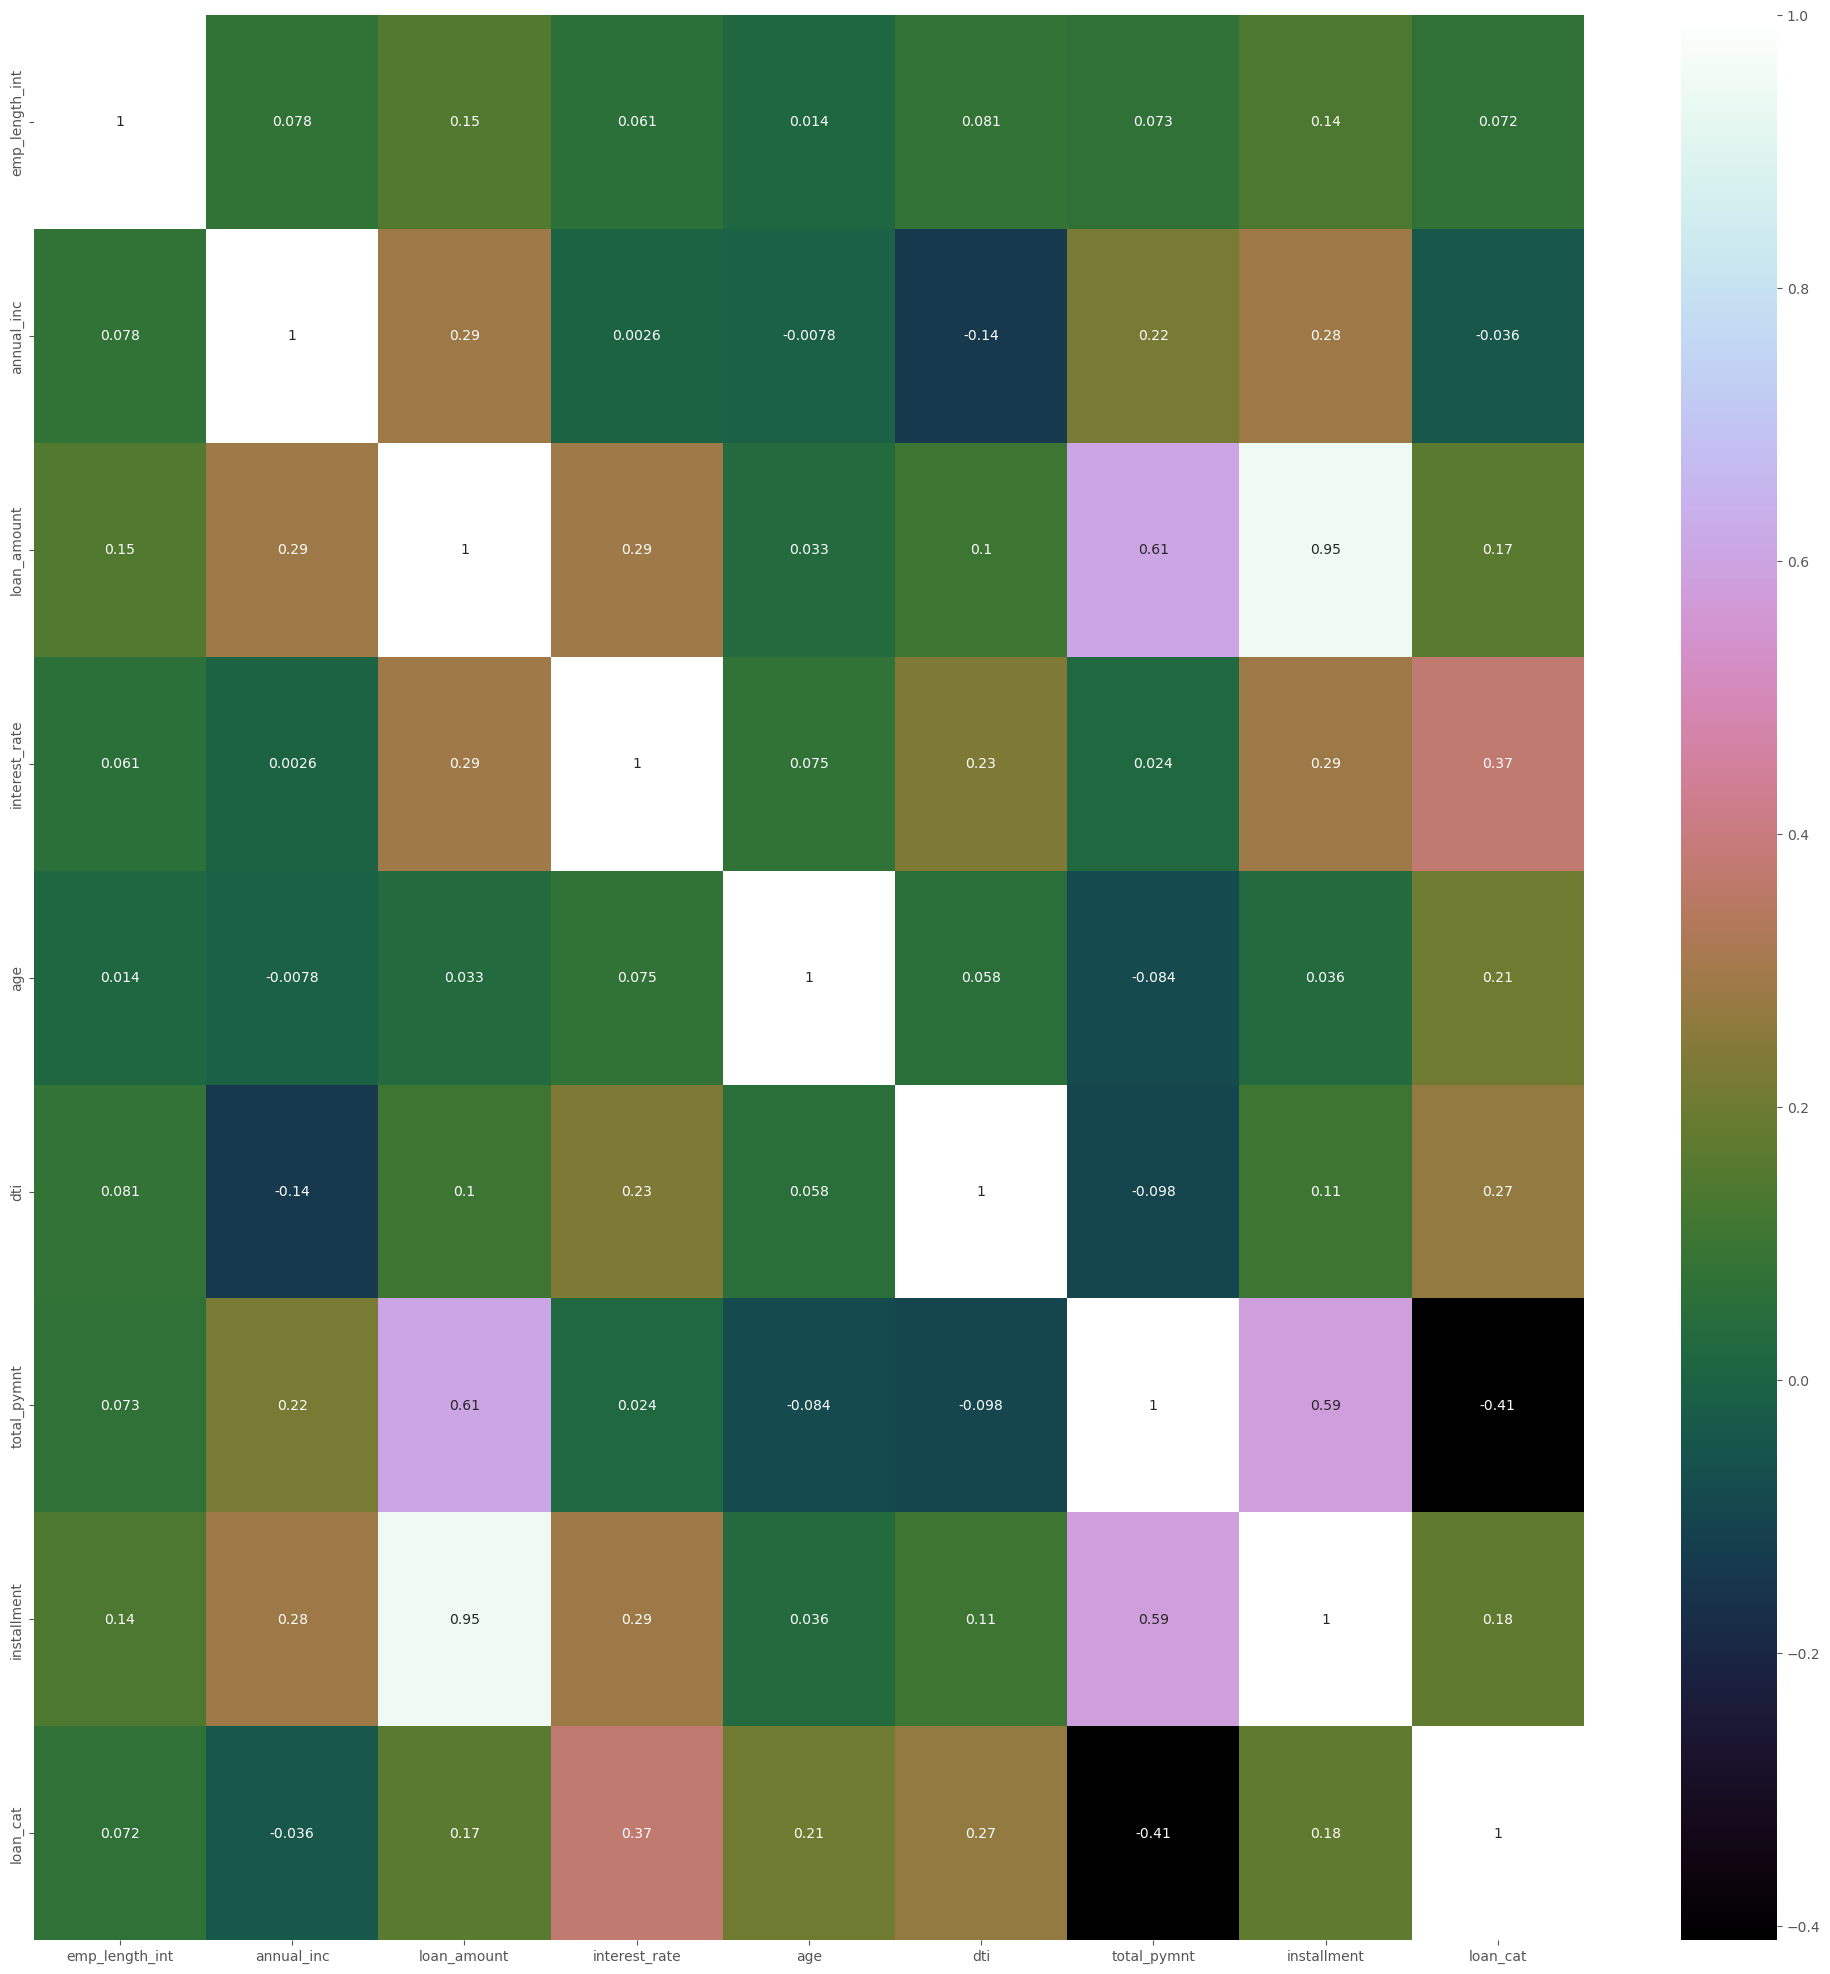

In [88]:
plt.figure(figsize=(25,25))
sns.heatmap(Train_Data.corr(), annot=True, cmap = 'cubehelix')

## : Classify and separate the training set based on dependent (target) and independent variables (inputs).

In [89]:
# specify input and output attributes
Input_cols = Train_Data.drop(columns=['loan_condition'], axis=1)
Target_cols= Train_Data['loan_condition']

## Handling Categorical Data with OneHotEncoding

In [90]:
#one hot encoding data
from sklearn.preprocessing import OneHotEncoder
 
numerical_cols_train = Input_cols.select_dtypes(include=np.number).columns.tolist()
categorical_cols_train = Input_cols.select_dtypes('object').columns.tolist()


In [91]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(Input_cols[categorical_cols_train])




c:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [92]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols_train))

In [93]:
Input_cols[encoded_cols] =encoder.transform(Input_cols[categorical_cols_train])
Train_Inputs=Input_cols[numerical_cols_train + encoded_cols]


In [94]:
Train_Inputs

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,loan_cat,home_ownership_Mortgage,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.5,85000,25000,0.324444,21,19.48,29324.32,829.10,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.5,30000,1000,0.531358,43,23.84,1207.76,35.20,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.5,65000,7000,0.266173,20,14.29,8215.45,228.22,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10.0,189500,7000,0.531358,55,22.47,1231.90,246.38,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,70000,25000,0.576296,18,10.50,6073.10,891.20,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,56000,15000,0.554568,58,25.11,0.00,531.44,1,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113276,7.0,101000,24000,0.576296,53,22.66,0.00,596.34,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113277,4.0,98000,2400,0.359012,27,17.32,0.00,80.40,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113278,3.0,61900,6000,0.498272,21,20.32,0.00,209.20,1,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [95]:
#cheking  data types of the coulmn
Train_Inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113280 entries, 0 to 113279
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   emp_length_int               113280 non-null  float64
 1   annual_inc                   113280 non-null  int64  
 2   loan_amount                  113280 non-null  int64  
 3   interest_rate                113280 non-null  float64
 4   age                          113280 non-null  int64  
 5   dti                          113280 non-null  float64
 6   total_pymnt                  113280 non-null  float64
 7   installment                  113280 non-null  float64
 8   loan_cat                     113280 non-null  int64  
 9   home_ownership_Mortgage      113280 non-null  float64
 10  home_ownership_None          113280 non-null  float64
 11  home_ownership_Other         113280 non-null  float64
 12  home_ownership_Own           113280 non-null  float64
 13 

In [96]:
Train_Inputs.describe()

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,loan_cat,home_ownership_Mortgage,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
count,113280.000000,1.132800e+05,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,...,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000,113280.000000
mean,5.626671,6.947177e+04,13579.070886,0.446361,47.578964,16.787528,9395.249278,408.286032,0.544703,0.458077,...,0.059075,0.579952,0.420048,0.138436,0.248773,0.254529,0.189124,0.108713,0.046628,0.013798
std,3.491567,6.438527e+04,8285.573758,0.222434,20.206136,8.045788,7928.634304,245.104487,0.498000,0.498242,...,0.235766,0.493568,0.493568,0.345358,0.432304,0.435598,0.391609,0.311280,0.210841,0.116651
min,0.500000,1.896000e+03,500.000000,0.000000,13.000000,0.000000,0.000000,15.670000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.200000e+04,7100.000000,0.286420,30.000000,10.810000,3584.020000,227.410000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000e+04,12000.000000,0.433086,47.000000,16.580000,7166.635000,354.450000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,8.300000e+04,18825.000000,0.596049,63.000000,22.380000,12862.712500,537.950000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,8.900060e+06,35000.000000,1.000000,90.000000,59.260000,56809.051630,1424.570000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Separating Independant and dependant Variable



In [97]:
# specify input and output attributes
x = Train_Inputs.drop(columns=['loan_cat'], axis=1)
y = Train_Inputs['loan_cat']




In [98]:
x

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,home_ownership_Mortgage,home_ownership_None,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0.5,85000,25000,0.324444,21,19.48,29324.32,829.10,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.5,30000,1000,0.531358,43,23.84,1207.76,35.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.5,65000,7000,0.266173,20,14.29,8215.45,228.22,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10.0,189500,7000,0.531358,55,22.47,1231.90,246.38,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,70000,25000,0.576296,18,10.50,6073.10,891.20,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113275,0.5,56000,15000,0.554568,58,25.11,0.00,531.44,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113276,7.0,101000,24000,0.576296,53,22.66,0.00,596.34,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
113277,4.0,98000,2400,0.359012,27,17.32,0.00,80.40,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113278,3.0,61900,6000,0.498272,21,20.32,0.00,209.20,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
y

0         0
1         0
2         0
3         1
4         1
         ..
113275    1
113276    1
113277    1
113278    1
113279    1
Name: loan_cat, Length: 113280, dtype: int64

## Splitting training and testing data set

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [101]:
x_train.head()

,emp_length_int,annual_inc,loan_amount,interest_rate,age,dti,total_pymnt,installment,home_ownership_Mortgage,home_ownership_None,...,purpose_home_improvement,interest_payments_High,interest_payments_Low,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
9619,3.0,60000,7000,0.126420,48,12.74,7842.770000,218.97,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
22060,10.0,107500,10000,0.115556,32,28.40,11218.070000,311.80,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5039,1.0,225000,3000,0.197531,64,11.77,3448.690000,95.85,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35655,2.0,44004,5000,0.176790,19,12.71,5713.859502,158.77,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63024,10.0,60000,6000,0.734815,74,7.34,6037.200000,223.60,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [102]:
y_test.head()

103342    1
63701     1
65078     1
59211     1
110520    1
Name: loan_cat, dtype: int64

## Model training

## 01.) Logistic regression

In [103]:
from sklearn.linear_model import LogisticRegression

#Creating an instance of the Logistic Regression model
logreg_model = LogisticRegression()

#Training the model on the training set
logreg_model.fit(x_train, y_train)

#Making predictions on the test set
y_pred = logreg_model.predict(x_test)

#Getting the predicted probabilities for the positive class
logreg_probabilities = logreg_model.predict_proba(x_test)[:, 1]

#Computing performance metrics
acc_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1score_logreg = f1_score(y_test, y_pred)
AUC_logreg = roc_auc_score(y_test, logreg_probabilities)

#Printing the results
print("Accuracy: ", acc_logreg*100)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1-Score:", f1score_logreg)
print("ROC-AUC Score:", AUC_logreg)

Accuracy:  87.33227401129943
Precision: 0.8782168025971969
Recall: 0.8927795218546245
F1-Score: 0.8854382883602108
ROC-AUC Score: 0.9452319280022046


In [104]:
#GETTING CLASSIFICATION REPORT
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     10027
           1       0.89      0.88      0.89     12629

    accuracy                           0.87     22656
   macro avg       0.87      0.87      0.87     22656
weighted avg       0.87      0.87      0.87     22656



## 02.)Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
#Training the model
randomForest_Model = RandomForestClassifier()
randomForest_Model=randomForest_Model.fit(x_train, y_train)
y_pred = randomForest_Model.predict(x_test)
RF_probability = randomForest_Model.predict_proba(x_test)[:,1]


#getting the accuracy , reacall and precission of the model using test set 
AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  94.23552259887006
Precision: 0.9643304652911202
Recall: 0.9292441439265878
F1-Score: 0.9464622448142986
ROC_AUC Score: 0.9410328040072822


In [106]:
#PRINT CLASSIFIACTION REPORT
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     10027
           1       0.89      0.88      0.89     12629

    accuracy                           0.87     22656
   macro avg       0.87      0.87      0.87     22656
weighted avg       0.87      0.87      0.87     22656



## Decision Tree Classifier

In [107]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
#Training the model
DT_model.fit(x_train, y_train)

y_pred = DT_model.predict(x_test)
RF_probability = DT_model.predict_proba(x_test)[:,1]


#getting the accuracy , reacall and precission of the model using test set 
AUC_DT=roc_auc_score(y_pred,y_test)
acc_DT=accuracy_score(y_test,y_pred)
recall_DT=recall_score(y_test,y_pred)
precision_DT=precision_score(y_test,y_pred)
f1score_DT=f1_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1-Score:",f1_score(y_test,y_pred))
print("ROC_AUC Score:",AUC_RF)


Accuracy :  93.67937853107344
Precision: 0.9418670097290344
Recall: 0.9429284391853819
F1-Score: 0.9423974255832663
ROC_AUC Score: 0.9410328040072822


In [108]:
#PRINT CLASSIFIACTION REPORT
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     10027
           1       0.89      0.88      0.89     12629

    accuracy                           0.87     22656
   macro avg       0.87      0.87      0.87     22656
weighted avg       0.87      0.87      0.87     22656



## COMPARISON AMONG THE MODELS


In [109]:
ind=['Logistic regression','Randomforest','Decision Tree']
data={"Accuracy":[accuracyLr,acc_rf,acc_DT],"Recall":[recallLr,recall_rf,recall_DT],"Precision":[precisionLr,precision_rf,precision_DT],
    'f1_score':[f1scoreLr,f1score_rf,f1score_DT],"ROC_AUC":[AUC_LR,AUC_RF,AUC_DT]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.873323,0.892780,0.878217,0.885438,0.872688
Randomforest,0.942355,0.929244,0.964330,0.946462,0.941033
Decision Tree,0.936794,0.942928,0.941867,0.942397,0.936243


** After building the model, to assess the relevance of the features selected, feature 
importance was performed.

[3.71456670e-02 4.56145211e-02 8.86449031e-02 9.59731381e-02
 1.01024991e-01 6.39120377e-02 2.83655432e-01 9.70374934e-02
 7.15400833e-03 3.24442239e-05 3.33292250e-04 4.89522779e-03
 7.11303497e-03 1.21118294e-03 3.90755869e-03 3.44321993e-03
 6.11095473e-03 5.62733609e-03 1.37236084e-06 1.51649677e-06
 2.42479790e-03 6.18878586e-03 8.47232654e-03 8.29303172e-04
 1.10113606e-03 2.89636973e-03 1.75328519e-03 1.16579733e-03
 4.37682147e-03 3.63441714e-04 2.70871318e-03 1.13609929e-03
 1.93789279e-03 3.44913024e-03 2.74210422e-02 2.74827248e-02
 2.44368805e-02 8.09065778e-03 6.32237872e-03 5.95914847e-03
 4.63293447e-03 2.92206759e-03 1.08893306e-03]


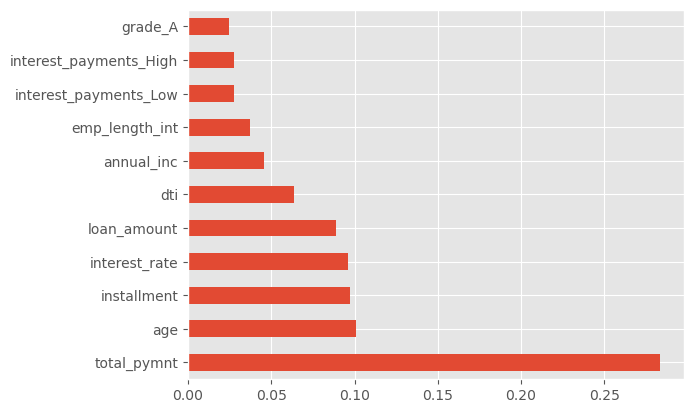

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
Model = ExtraTreesClassifier()
Model.fit(x,y)
#use inbuilt class feature_importances of tree based class
print(Model.feature_importances_) 

#plot of feature importances for best visualization
feat_importances = pd.Series(Model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [111]:
#So that choose Random Forest as the best algorithm

In [112]:
#downloading the model
import pickle
file = open("randomForest_Model.pkl", 'wb')
pickle.dump(randomForest_Model, file)